In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob3.mat"
mat_data = scipy.io.loadmat(mat_path)

A = mat_data['A']
b = mat_data['b']
x_orig = mat_data['x_orig']

In [3]:
def normest_numpy(A):
    """
    NumPy를 이용하여 행렬 A의 2-노름을 추정하는 함수.
    """
    # SVD를 계산합니다. full_matrices=False로 설정하여 경제적 SVD를 수행합니다.
    U, s, V = scipy.sparse.linalg.svds(A)
    # 가장 큰 특이값 반환
    return s[0]

def Dh(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 1:cols] = u[:, 1:cols] - u[:, 0:cols-1]
    d[:, 0] = u[:, 0] - u[:, cols-1]
    return d

def Dht(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 0:cols-1] = u[:, 0:cols-1] - u[:, 1:cols]
    d[:, cols-1] = u[:, cols-1] - u[:, 0]
    return d

def Dv(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[1:rows, :] = u[1:rows, :] - u[0:rows-1, :]
    d[0, :] = u[0, :] - u[rows-1, :]
    return d

def Dvt(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[0:rows-1, :] = u[0:rows-1, :] - u[1:rows, :]
    d[rows-1, :] = u[rows-1, :] - u[0, :]
    return d

In [4]:
mu = 1
stopping_point = 2e-4

# # normest를 이용해 tau와 sigma 계산
norm_est = normest_numpy(A)
tau = 1 / norm_est**2
sigma = 1 / (tau * norm_est**2)
sigma_1 = (tau * norm_est**2)

theta = 1/np.sqrt(1 + 2 * mu)

In [5]:
y1 = np.zeros(b.shape)
y2 = np.zeros((256,256))
y3 = np.zeros((256,256))
x = np.zeros((256,256))

z1 = np.zeros(b.shape)
z2 = np.zeros((256,256))
z3 = np.zeros((256,256))

y2 = Dh(x)
y3 = Dv(x)
x = x.reshape(65536, 1)
y1 = A @ x
x = x.reshape(256,256)

for idx in range(10000):

    # step 1
    Dhx = Dh(x)
    Dvx = Dv(x)

    # step 2

    # HardThresholding
    z2 = sigma_1 * y2 + Dhx
    z3 = sigma_1 * y3 + Dvx
    z2[np.abs(sigma_1 * y2 + Dhx) < sigma_1] = 0
    z3[np.abs(sigma_1 * y3 + Dvx) < sigma_1] = 0

    
    x = x.reshape(65536, 1)
    z1 = ((sigma_1 * y1 + A @ x) + (mu * b/ sigma)) / (1 + mu / sigma)    
    
    # step 3
    x_minus1 = x

    y1 = y1 + sigma * (A @ x - z1)
    y2 = y2 + sigma * (Dhx - z2)
    y3 = y3 + sigma * (Dvx - z3)
    
    
    y2 = y2.reshape(65536, 1)
    y3 = y3.reshape(65536, 1)
    
    x = x - (tau * (A.T @ y1 + y2 + y3))
    x[x<0] = 0
    
    x = x + theta * (x - x_minus1)

    x = x.reshape(256,256)
    y2 = y2.reshape(256,256)
    y3 = y3.reshape(256,256)
    x_minus1 = x_minus1.reshape(256,256)
    
    print(idx, np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2))
    if (np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2)) < stopping_point:
        break

0 1.0
1 3.5274576204341277
2 1.3557814728326099
3 4.753474126239157
4 1.2435827896935654
5 3.817060833425024
6 0.9097140113056035
7 1.3939271807967724
8 0.5159256306848036
9 0.41495220115601467
10 0.18905458077982387
11 0.10867737855474041
12 0.05848236347193433
13 0.03808432797736839
14 0.02372413687175235
15 0.014008396317838076
16 0.007135818147488623
17 0.004558970053328981
18 0.003863473362434333
19 0.0035056097860767673
20 0.003269307000567057
21 0.0030366479077227316
22 0.0028800998389346593
23 0.0027471541924657377
24 0.0026179400156020145
25 0.0024942440481427355
26 0.0023835797440884716
27 0.002280215457886322
28 0.002180216950083204
29 0.002102322824852687
30 0.002013506797649768
31 0.0019375156561785495
32 0.0018647671829287215
33 0.0017989855154427535
34 0.0017375645169084028
35 0.0016749288110586055
36 0.0016213931837533537
37 0.00156749168556365
38 0.001526304104450287
39 0.0014756559211714926
40 0.0014356955430014236
41 0.0013905885326038084
42 0.0013473397684577297
43 

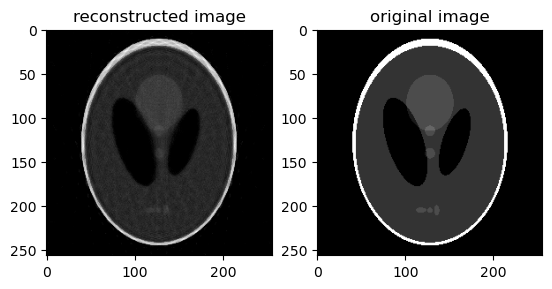

In [6]:
# original f 
x = x.reshape((256, 256))
plt.subplot(121)
plt.imshow(x.T, cmap = "gray")
plt.title( label = "reconstructed image")

 
x = x.reshape((256, 256))
plt.subplot(122)
plt.imshow(x_orig, cmap = "gray")
plt.title( label = "original image")

plt.show()